In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from matplotlib.patches import Ellipse
from numpy import random as rnd 
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
presidents_df = pd.read_csv('https://sololearn.com/uploads/files/president_heights_party.csv', index_col='name')
# CRIM per capita crime rate by town

# ZN proportion of residential land zoned for lots over 25,000 sq.ft.

# INDUS proportion of non-retail business acres per town

# CHAS Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

# NOX nitric oxides concentration (parts per 10 million)

# RM average number of rooms per dwelling

# AGE proportion of owner-occupied units built prior to 1940

# DIS weighted distances to five Boston employment centres

# RAD index of accessibility to radial highways

# TAX full-value property-tax rate per $10,000

# PTRATIO pupil-teacher ratio by town

# B 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

# LSTAT % lower status of the population

# MEDV Median value of owner-occupied homes in $1000’s
# КРИМ на душу населения уровень преступности по городам

# ZN доля жилой земли, зонированной для участков более 25 000 кв. Футов.

# INDUS доля не-розничных бизнес-акров на город

# CHAS Фиктивная переменная Чарльз-Ривер (= 1, если путь ограничивает реку; 0 в противном случае)

# Концентрация оксидов азота NOX (частей на 10 миллионов)

# RM среднее количество комнат на одно жилище

# ВОЗРАСТНАЯ доля занимаемых владельцами квартир, построенных до 1940 года

# DIS взвешивает расстояния до пяти бостонских центров занятости

# RAD индекс доступности к радиальным магистралям

# НАЛОГОВАЯ НАЛОГОВАЯ Налоговая ставка на имущество на 10 000

# Соотношение учеников и учителей PTRATIO по городам

# B 1000 (Bk - 0,63) ^ 2 где Bk - доля чернокожих по городам

# LSTAT% ниже статуса населения

# MEDV Средняя стоимость домов, занимаемых владельцами, в 1000 долл. США

In [2]:
boston_dataset = load_boston()
boston = pd.DataFrame(boston_dataset.data, columns = boston_dataset.feature_names )
boston['MEDV'] = boston_dataset.target

In [3]:
boston.shape

(506, 14)

In [4]:
boston.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [5]:
boston[['CHAS', 'RM', 'RAD', 'MEDV']].head()

,CHAS,RM,RAD,MEDV
0,0.0,6.575,1.0,24.0
1,0.0,6.421,2.0,21.6
2,0.0,7.185,2.0,34.7
3,0.0,6.998,3.0,33.4
4,0.0,7.147,3.0,36.2


In [6]:
boston.describe().round(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00
mean,3.61,11.36,11.14,0.07,0.55,6.28,68.57,3.80,9.55,408.24,18.46,356.67,12.65,22.53
std,8.60,23.32,6.86,0.25,0.12,0.70,28.15,2.11,8.71,168.54,2.16,91.29,7.14,9.20
min,0.01,0.00,0.46,0.00,0.38,3.56,2.90,1.13,1.00,187.00,12.60,0.32,1.73,5.00
25%,0.08,0.00,5.19,0.00,0.45,5.89,45.02,2.10,4.00,279.00,17.40,375.38,6.95,17.02
50%,0.26,0.00,9.69,0.00,0.54,6.21,77.50,3.21,5.00,330.00,19.05,391.44,11.36,21.20
75%,3.68,12.50,18.10,0.00,0.62,6.62,94.07,5.19,24.00,666.00,20.20,396.22,16.96,25.00
max,88.98,100.00,27.74,1.00,0.87,8.78,100.00,12.13,24.00,711.00,22.00,396.90,37.97,50.00


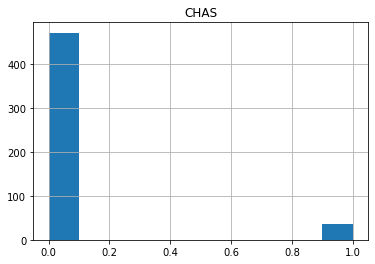

In [7]:
boston.hist('CHAS')
plt.show()

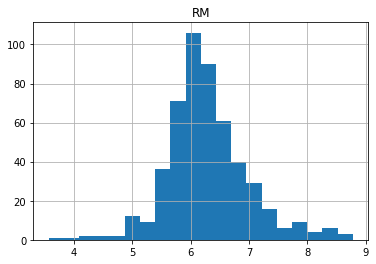

In [8]:
boston.hist(column = 'RM', bins = 20 ) 
plt.show()

In [9]:
corr_matrix = boston.corr().round(2)
print(corr_matrix)

         CRIM    ZN  INDUS  CHAS   NOX    RM   AGE   DIS   RAD   TAX  PTRATIO  \
CRIM     1.00 -0.20   0.41 -0.06  0.42 -0.22  0.35 -0.38  0.63  0.58     0.29   
ZN      -0.20  1.00  -0.53 -0.04 -0.52  0.31 -0.57  0.66 -0.31 -0.31    -0.39   
INDUS    0.41 -0.53   1.00  0.06  0.76 -0.39  0.64 -0.71  0.60  0.72     0.38   
CHAS    -0.06 -0.04   0.06  1.00  0.09  0.09  0.09 -0.10 -0.01 -0.04    -0.12   
NOX      0.42 -0.52   0.76  0.09  1.00 -0.30  0.73 -0.77  0.61  0.67     0.19   
RM      -0.22  0.31  -0.39  0.09 -0.30  1.00 -0.24  0.21 -0.21 -0.29    -0.36   
AGE      0.35 -0.57   0.64  0.09  0.73 -0.24  1.00 -0.75  0.46  0.51     0.26   
DIS     -0.38  0.66  -0.71 -0.10 -0.77  0.21 -0.75  1.00 -0.49 -0.53    -0.23   
RAD      0.63 -0.31   0.60 -0.01  0.61 -0.21  0.46 -0.49  1.00  0.91     0.46   
TAX      0.58 -0.31   0.72 -0.04  0.67 -0.29  0.51 -0.53  0.91  1.00     0.46   
PTRATIO  0.29 -0.39   0.38 -0.12  0.19 -0.36  0.26 -0.23  0.46  0.46     1.00   
B       -0.39  0.18  -0.36  

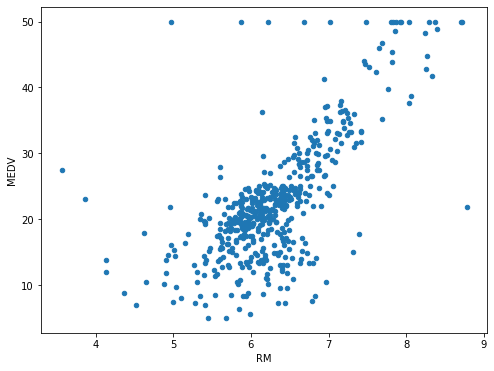

In [10]:
boston.plot(kind = 'scatter', x = 'RM', y = "MEDV", figsize = (8, 6));


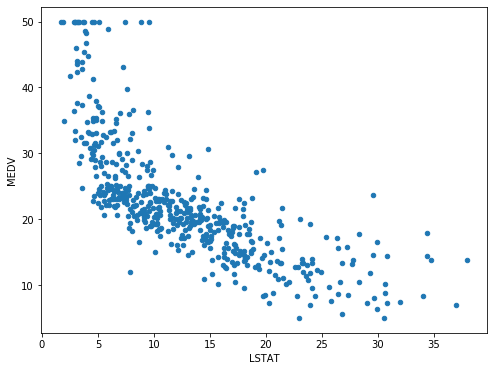

In [11]:
boston.plot(kind = 'scatter', x = 'LSTAT', y = 'MEDV' , figsize = (8, 6))


In [12]:
X = boston[['RM']]
print(X.shape)
Y = boston[['MEDV']]
print(Y.shape)

(506, 1)
(506, 1)


In [19]:
model = LinearRegression()
print(model)

LinearRegression()


In [20]:
from sklearn.model_selection import train_test_split 
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3, random_state = 1)

In [22]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(X_test.shape)

(354, 1)
(152, 1)
(354, 1)
(152, 1)


In [23]:
model.fit(X_train, Y_train)

LinearRegression()

In [25]:
model.intercept_.round(2)

array([-30.57])

In [26]:
model.coef_.round(2)

array([[8.46]])

In [28]:
new_RM = np.array([6.5]).reshape(-1,1)# make sure it's 2d
model.predict(new_RM)

array([[24.42606323]])

model.intercept_ + model.coef_ * 6.5

In [30]:
y_test_predicted = model.predict(X_test)
y_test_predicted.shape


(152, 1)

In [31]:
Y_test.shape

(152, 1)

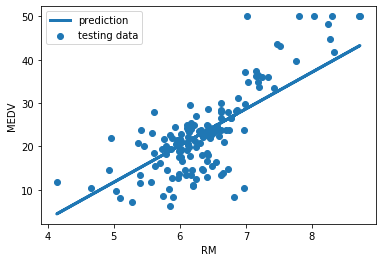

In [32]:
plt.scatter(X_test, Y_test, label = 'testing data')
plt.plot(X_test, y_test_predicted, label = 'prediction' ,linewidth = 3 )
plt.xlabel('RM'); plt.ylabel('MEDV')
plt.legend(loc = 'upper left')
plt.show()

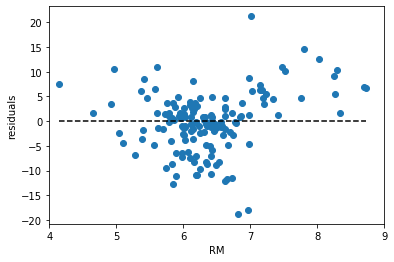

In [37]:
residuals = Y_test - y_test_predicted

#plot the residuals 
plt.scatter(X_test, residuals)
#plot a horizont line at y = 0 
plt.hlines(y = 0, xmin = X_test.min(), xmax = X_test.max(), linestyle = '--')
#set xlim
plt.xlim((4, 9))
plt.xlabel('RM')
plt.ylabel('residuals')
plt.show()


In [39]:
residuals[:5]

,MEDV
307,0.821016
343,-2.184437
47,-3.849350
67,2.836736
362,6.002659


In [40]:
residuals.mean()

MEDV   -0.236451
dtype: float64

In [41]:
(residuals**2).mean()

MEDV    36.517215
dtype: float64

In [45]:
from sklearn.metrics import mean_squared_error
mean_squared_error(Y_test, y_test_predicted)

36.517214730838624

In [46]:
model.score(X_test, Y_test)

0.6015774471545623

In [57]:
a = ((Y_test - Y_test.mean())**2).sum()
print(a)

MEDV    13931.482039
dtype: float64


In [58]:
b = (residuals**2).sum()
print(b)

MEDV    5550.616639
dtype: float64


In [59]:
c = 1 - b/a
print(c)

MEDV    0.601577
dtype: float64


In [62]:
#data preparetion 
X2 = boston[['RM', 'LSTAT']]
Y = boston['MEDV']
#train test split 
#same random_state to ensure the same splits
X2_train, X2_test, Y_train, Y_test = train_test_split(X2, Y, test_size = 0.3, random_state = 1)
model2 = LinearRegression()
model2.fit(X2_train, Y_train)

LinearRegression()

In [73]:
print(model2.intercept_)
print(model2.coef_)

5.316818471096038
[ 4.12674118 -0.67762654]


In [76]:
y_test_predicted = model2.predict(X2_test)
print(y_test_predicted)

[28.478341   28.08411889 17.46168887 24.08502818 20.53939027 24.07720618
 29.49226779 21.53814087 17.73198767 25.82822684 27.92749205 30.56017902
 19.744675   22.25937394 22.23039758 20.23997311 17.00747983 38.18522442
 25.71103246  5.63483384 21.06717172 17.25963598 26.12875354 27.64278875
 28.10950458 13.1207732  16.69050892 22.99963249 31.4303435  13.43144011
 28.74647902 15.93821689 36.51949271 19.97289731 24.51189106 20.56294206
 19.42950819 31.19888826  6.57747007 20.39686851 26.47769159 26.7825762
 27.47762993 14.41499805 18.62310619 18.06847281 36.21261023 18.53174991
 23.84655008 24.54542564 26.22034649 23.95166915 28.32133001 23.87204143
  6.22235564 27.39863295  9.1580405  26.52852129 20.09521683 36.67342818
 21.59540558 28.25221122 15.5348794  19.56003936  7.62687753 30.70623418
 38.04772217 26.44423625 23.06709024 21.58718845 27.19740561  5.35113993
 16.31106342 24.74072319 21.05360377 22.03423263 32.26426006 26.36981291
 27.17424345 32.40241397 21.42721859 23.18437379 31.

In [80]:
mean_squared_error(Y_test, y_test_predicted).round(2) #it's predict2, also in local 

28.93